# Exercise 02: Classifier Comparison

In this exercise, you'll run several classifiers on the same data and compare their effectiveness.

## Installing Modules

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib seaborn pandas

## Setup

Load the pre-canned wine dataset:

In [2]:
from sklearn import datasets
dataset = datasets.load_wine()

Split test data into training/testing sets:

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], test_size=0.4, random_state=20
)

## K Nearest Neighbors

Spend a little time learning about K Nearest Neighbor (KNN) classifiers.

Once you have a handle on how they work, run the code below and inspect the results.

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.81      0.62      0.70        34
           2       0.38      0.47      0.42        17

    accuracy                           0.68        72
   macro avg       0.66      0.68      0.66        72
weighted avg       0.70      0.68      0.68        72


Confusion matrix:
[[20  0  1]
 [ 1 21 12]
 [ 4  5  8]]


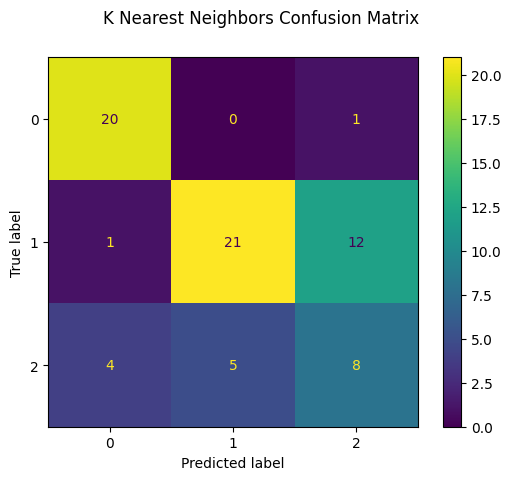

In [48]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("K Nearest Neighbors Confusion Matrix")
plt.show()

## Support Vector Machines

Spend a little time learning about support vector machine (SVM) classifiers.

I've copied the KNN code from above to get you started...modify it to run a support vector machine classifier, and inspect the results.

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.77      0.68      0.72        34
           2       0.43      0.59      0.50        17

    accuracy                           0.72        72
   macro avg       0.73      0.72      0.72        72
weighted avg       0.76      0.72      0.73        72


Confusion matrix:
[[19  0  2]
 [ 0 23 11]
 [ 0  7 10]]


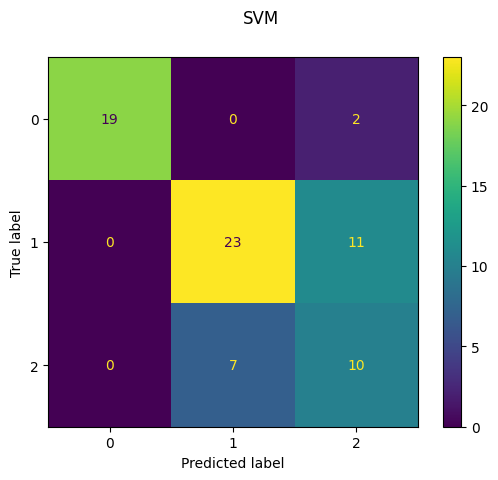

In [49]:
##
## UPDATE THIS CODE
##

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("SVM")
plt.show()

## Decision Trees

Spend a little time learning about decision tree classifiers.

I've copied the KNN code from above to get you started...modify it to run a decision tree classifier, and inspect the results.

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        34
           2       1.00      1.00      1.00        17

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72


Confusion matrix:
[[20  1  0]
 [ 1 33  0]
 [ 0  0 17]]


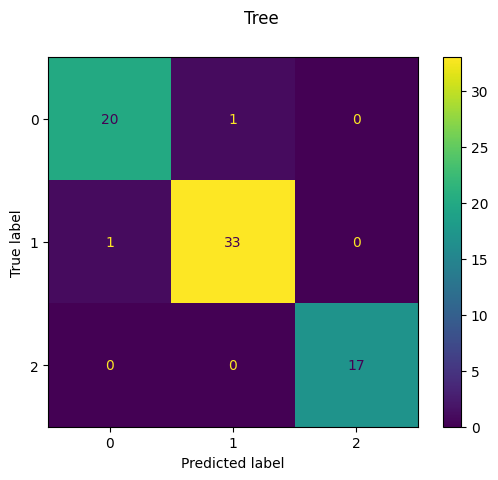

In [50]:
##
## UPDATE THIS CODE
##

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("Tree")
plt.show()

## Random Forest Classifiers

Spend a little time learning about random forest classifiers.

I've copied the KNN code from above to get you started...modify it to run a random forest classifier, and inspect the results.

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        17

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72


Confusion matrix:
[[21  0  0]
 [ 0 34  0]
 [ 0  0 17]]


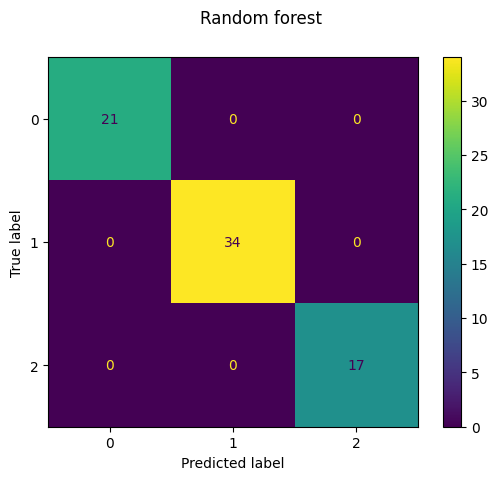

In [53]:
##
## UPDATE THIS CODE
##

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("Random forest")
plt.show()

## Questions

Compare and contrast the performance of the classifiers. Which do you think is best, and which worst? Are there any patterns? Anything else interesting to report?

YOUR ANSWER HERE
Random forest seems to have the highest recall and precision while the SVM method has the lowest recall and precision. Changing the depth of the random forest will change how high the recall and precision are. I think this is because the depth is the amount of trees the model is running through.

Was there a pattern to the changes you needed to make?  What does that say about the design of the `scikit-learn` estimators and APIs?

YOUR ANSWER HERE
All the changes required 2 lines and a name change. sklearn makes implementing different estimators really easy and fast.

## Follow-up

Go back to the train/test split step, and change the `random_state` value.  Rerun the classifiers and inspect the results.  Do this several times for several `random_state` values.  What do you observe?

What does this imply about the training process?

YOUR ANSWER HERE
Increasing randomness allows the model to train more effectively without being able to memorize the dataset. If the random state is too high the model might get shown the wrong answers when training.

What is `random_state` doing?

YOUR ANSWER HERE
random state is shuffling the training dataset

What should you do to ensure your ML results are reproducible?

YOUR ANSWER HERE
When running the random forest multiple times with 100 depth the output changed from a couple different options; however changing some variables I was able to reproduce the same results multiple times. Experimenting with the different parameters is super important to find a stable response from the model to be able to reproduce it in the future. 

**MAKE SURE YOU SAVE, COMMIT, AND PUSH YOUR NOTEBOOKS TO YOUR REPO!!**